In [287]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [288]:
df=pd.read_csv('/content/Housing.csv')

In [289]:
df.shape

(545, 13)

In [290]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [292]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [293]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [294]:
df.duplicated().sum()

np.int64(0)

In [295]:
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [299]:
# Step 3: Convert categorical features into numerical (Label Encoding)
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

In [300]:
print(df.dtypes)

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object


In [301]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [302]:
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

In [303]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-1.406286


In [304]:
from sklearn.model_selection import train_test_split

In [305]:
# Features (X) and Target (y)
X = df.drop("price", axis=1)
y = df["price"]

In [306]:

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [307]:
from sklearn.linear_model import LinearRegression

In [308]:
# Initialize and fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [309]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [310]:
#Predictions
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [311]:
# Train Metrics
mae_train=mean_absolute_error(y_train,y_train_pred)
mse_train=mean_squared_error(y_train,y_train_pred)
r2_train=r2_score(y_train,y_train_pred)


In [312]:
#Test metrics
mae_test=mean_absolute_error(y_test,y_test_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
r2_test=r2_score(y_test,y_test_pred)

In [313]:
print("Train mae: " , mae_train)
print("Train mse: " , mse_train)
print("Train r2: " , r2_train)
print("Test mae: " , mae_test)
print("Test mse: " , mse_test)
print("Test r2: " , r2_test)


Train mae:  0.3842980815255296
Train mse:  0.27774000540393345
Train r2:  0.6854429472843789
Test mae:  0.5242509357450866
Test mse:  0.5073561548750559
Test r2:  0.6494754192267794


In [314]:
print(type(plt.xlabel))


<class 'function'>


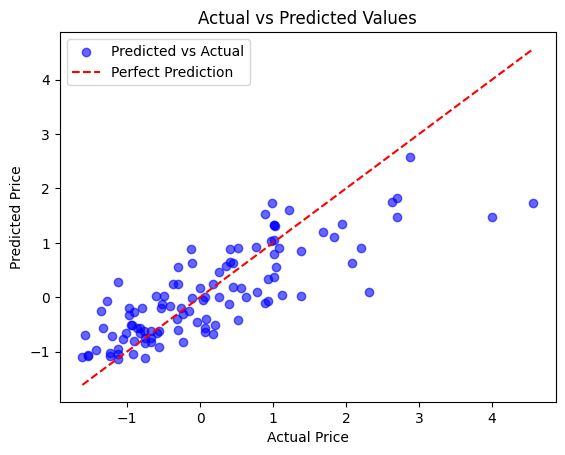

In [320]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred, color="blue", alpha=0.6, label="Predicted vs Actual")

max_val = max(max(y_test), max(y_test_pred))
min_val = min(min(y_test), min(y_test_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Perfect Prediction")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()


In [318]:
# Interpret Coefficients
coeff_df=pd.DataFrame({
    "Feature":X.columns,
    "Coefficient":lr.coef_
}).sort_values(by="Coefficient",ascending=False)

print(coeff_df)

             Feature  Coefficient
2          bathrooms     0.294726
0               area     0.273639
8    airconditioning     0.195367
3            stories     0.188403
10          prefarea     0.142891
9            parking     0.103991
6           basement     0.100380
7    hotwaterheating     0.077009
4           mainroad     0.068373
5          guestroom     0.047721
1           bedrooms     0.031005
11  furnishingstatus    -0.085643
